In [42]:
from fipy import *
from fipy.tools import numerix
import matplotlib.pyplot as plt

In [43]:
R = 10.  ## teljes hossz, amire lefut a program
nr = 20  ## ennyi részre lesz felosztva
dr = R / nr
mesh = Grid1D(dx=dr, nx=nr)  ## új mesh nr számú dr széles lépésközzel

## diffúziós-, konvekciós- és forrásegyütthatók
diffCoeff = 1.
convCoeff = [1.,]
sourceCoeff = 1.

## idő bevezetése
duration = Variable(10.)
dt = Variable(0.1)
t = Variable(0.)
imax = int((duration.value / dt.value) + 1)
i = 0
print(imax)

print(t.value)
print(dt.value)

## határfeltételekhez adatok
valueLeft = 1.
gradLeft = (0.,)
valueRight = 0.

## "megoldási változó" - sűrűségfv
f = CellVariable(mesh=mesh, name="sűrűségfv", value=1.) # kezdeti feltétel az egész tartományra
f.setValue(10., where= mesh.x == R/2)

## határfeltételek érvényesítése
f.constrain(valueLeft, mesh.facesLeft)
f.faceGrad.constrain(gradLeft, where=mesh.facesLeft)
f.constrain(valueRight, mesh.facesRight)

101
0.0
0.1


2.6016374294300366
4.920148228199213 

[2.60163743 4.92014823 6.13230286 6.67238171 6.80419615 6.68800309
 6.42115346 6.06278481 5.6488213  5.20108569 4.73283464 4.25212109
 3.763837   3.27095403 2.7752774  2.27790371 1.77949911 1.28046826
 0.78105699 0.28141462]
[2.60163743 4.92014823 6.13230286 6.67238171 6.80419615 6.68800309
 6.42115346 6.06278481 5.6488213  5.20108569 4.73283464 4.25212109
 3.763837   3.27095403 2.7752774  2.27790371 1.77949911 1.28046826
 0.78105699 0.28141462]


C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)
C:\ProgramData\Anaconda3\lib\site-packages\fipy\viewers\matplotlibViewer\__init__.py:120: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)


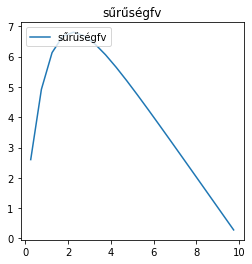

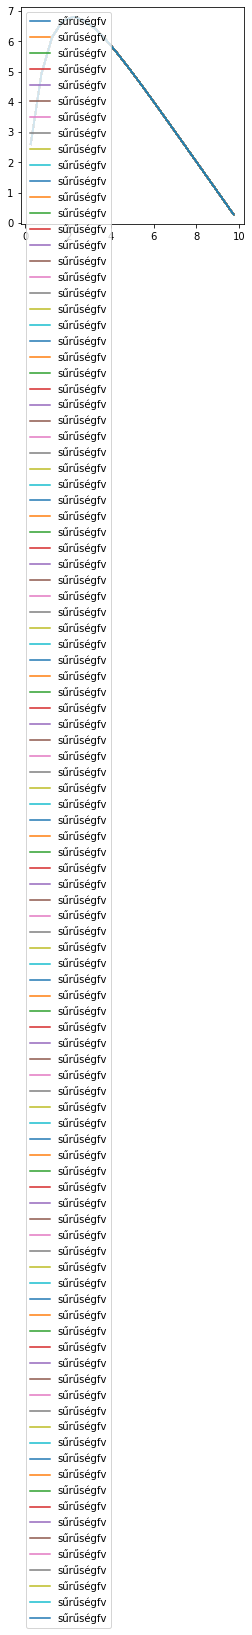

In [44]:
## az egyenlet alakja FiPy-ban az együtthatókkal
eq = (TransientTerm() == DiffusionTerm(coeff=diffCoeff)
      + PowerLawConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

# solution1D = numerix.empty(imax, CellVariable)  # 1D üres numpy array
solution1D = []  # 1D üres dinamikus lista


while i != imax:
    t = t + dt
    eq.solve(var=f, solver=DummySolver(), dt=t)
    solution1D.append(f)
    # solution2D[i] = t.value
    i += 1

print(f.value[0])
print(f.value[1], "\n")
print(solution1D[0].value)
print(solution1D[100].value)
viewer = Viewer(vars=f)
viewer = Viewer(vars=solution1D)


#viewer1 = Viewer(vars=solution2D[1])
#viewer2 = Viewer(vars=solution2D[99])